In [1]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import urllib

1. https://www.bnf.fr/sites/default/files/2019-10/btv1b8457904c_f1.jpg

In [4]:
image = img.imread("sample_data/rose.jpg")

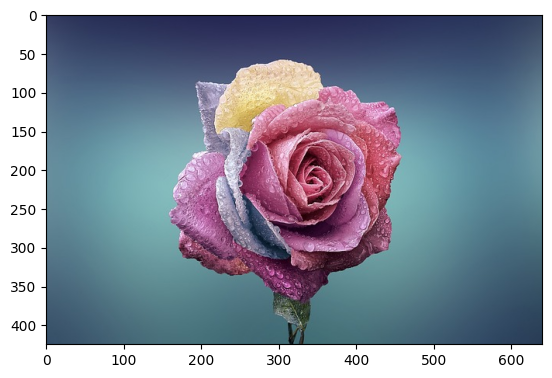

In [95]:

plt.imshow(image, vmin=0, vmax=255)

In [6]:
image.shape

(425, 640, 3)

In [7]:
a = np.array([[1,2,3],[2,3,4]])
a.mean()

2.5

In [8]:
print(image[1:4,1:4,0].shape)

(3, 3)


In [9]:
print(image[1:4])

[[[53 61 97]
  [53 61 97]
  [53 61 97]
  ...
  [55 69 96]
  [56 70 97]
  [56 70 97]]

 [[53 61 97]
  [53 61 97]
  [53 61 97]
  ...
  [56 70 97]
  [56 70 97]
  [56 70 97]]

 [[54 62 98]
  [53 61 97]
  [53 61 97]
  ...
  [56 70 97]
  [57 71 98]
  [57 71 98]]]


In [10]:
image[1:3][1:3][0]

array([[53, 61, 97],
       [53, 61, 97],
       [53, 61, 97],
       ...,
       [56, 70, 97],
       [56, 70, 97],
       [56, 70, 97]], dtype=uint8)

In [15]:
def mean_filtering(image,size = 3):
  size2 = size * size
  sk = size//2
  dh = image.shape[0]
  dw = image.shape[1]
  kvr = []
  for i in range(dh):
    jj = []
    for j in range(dw):
      l = []
      for k in range(image.shape[2]):
        ir = it = jt = jr = 0
        if i-sk < 0:
          ir = sk
        elif i+sk >= dh-1:
          it = -sk
        if j-sk < 0:
          jr = sk
        elif j+sk >= dw-1:
          jt = -sk
        r = image[i-sk+ir:i+sk+1+it,j-sk+jr:j+sk+1+jt,k]
        l.append(r.sum()//(size2))
      jj.append(l)
    kvr.append(jj)
  return kvr

In [12]:
kvr = mean_filtering(image)

<ipython-input-94-f3ba592277e3>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kvr_int = kvr.astype(np.int)


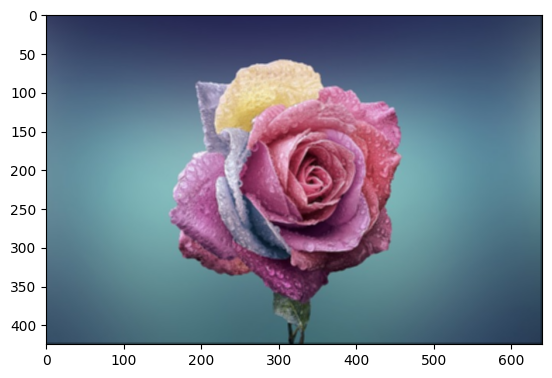

In [94]:
# plt.figure(figsize=(8,8))

kvr = np.array(kvr)
kvr_int = kvr.astype(np.int)
plt.imshow(kvr_int)

In [76]:
def add_images(img1, img2):
    assert(img1.shape[0] == img2.shape[0])
    assert(img1.shape[1] == img2.shape[1])
    assert(img1.shape[2] == img2.shape[2])

    new_image = np.zeros(img1.shape)


    for r in range(img1.shape[0]):
      for col in range(img1.shape[1]):
          new_image[r][col] = img1[r][col] + img2[r][col]

          for k in range(3):
            if(new_image[r][col][k] > 255):
                new_image[r][col][k] = 255
            else:
                new_image[r][col][k] = int(new_image[r][col][k])

    return new_image




In [70]:
image_first = img.imread('walmart.jpg')
image_second = img.imread('bitstamp.jpg')

In [71]:
print(image_first.shape)

print(image_second.shape)


(300, 300, 3)
(300, 300, 3)


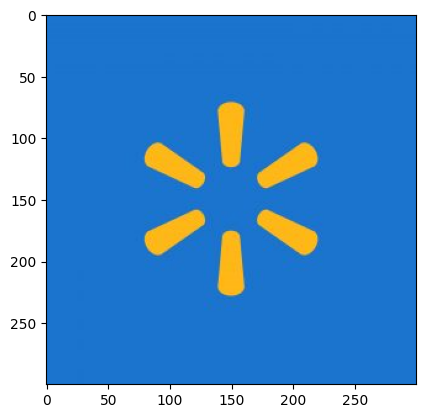

In [72]:
plt.imshow(image_first)

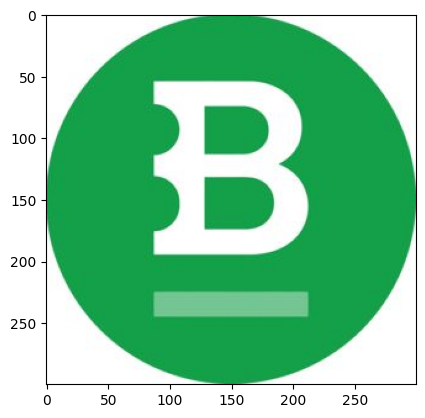

In [58]:
plt.imshow(image_second)

In [83]:
new_image = add_images(image_first, image_second)

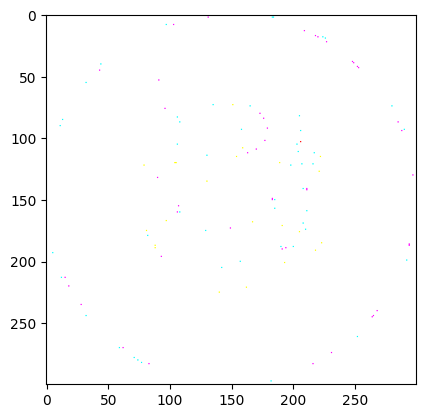

In [84]:
plt.imshow(new_image,vmin=0,vmax=255)

In [87]:


print(new_image.min(), new_image.max()) # Check the minimum and maximum values
print(new_image.dtype) # Check the data type

0.0 255.0
float64


In [88]:
img_int = new_image.astype(np.int)

<ipython-input-88-7a0d4cb61d1f>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_int = new_image.astype(np.int)


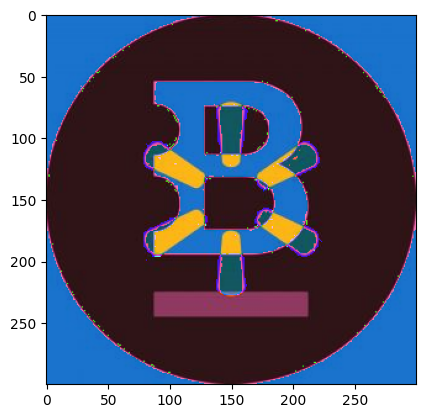

In [89]:
plt.imshow(img_int)

In [96]:
def sub_images(img1, img2):
    assert(img1.shape[0] == img2.shape[0])
    assert(img1.shape[1] == img2.shape[1])
    assert(img1.shape[2] == img2.shape[2])

    new_image = np.zeros(img1.shape)


    for r in range(img1.shape[0]):
      for col in range(img1.shape[1]):
          new_image[r][col] = img1[r][col] - img2[r][col]

          for k in range(3):
            if(new_image[r][col][k] > 255):
                new_image[r][col][k] = 255
            else:
                new_image[r][col][k] = int(new_image[r][col][k])

    return new_image




In [97]:
sub_image_output = sub_images(image_first, image_second)

<ipython-input-99-74a6915a4d11>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sub_image_output_int = sub_image_output.astype(np.int)


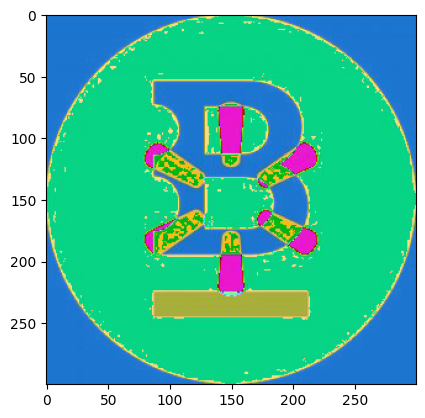

In [99]:
sub_image_output_int = sub_image_output.astype(np.int)

plt.imshow(sub_image_output_int)